In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [2]:
df=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Clustering/crime_data1.csv")

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [4]:
df.describe()

,Murder,Assault,UrbanPop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


In [7]:
df.columns = ['City','Murder','Assault','Urbanpop','Rape','Total']
df.head(
  
)

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


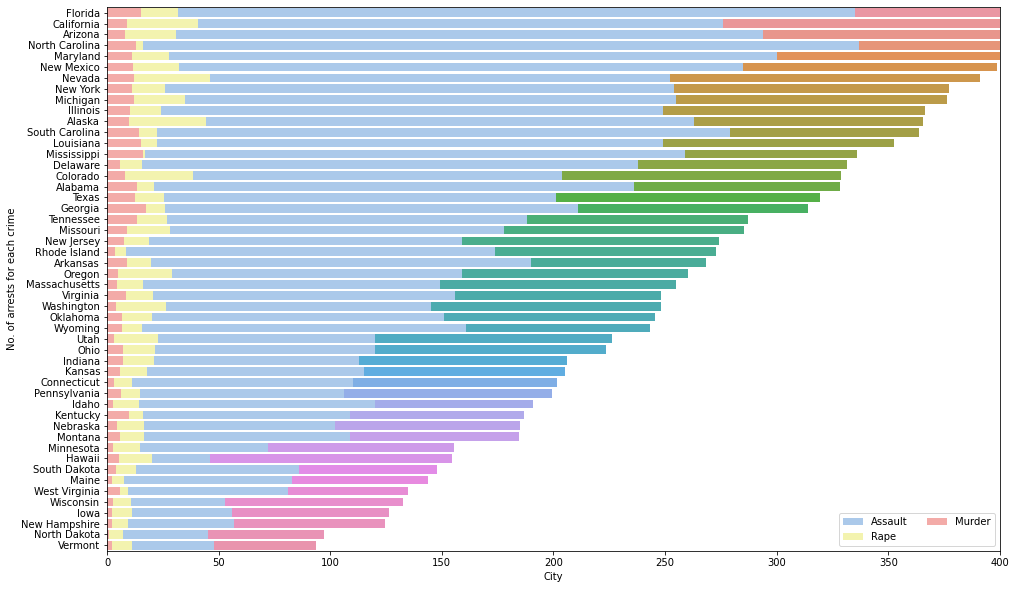

In [12]:
f, ax = plt.subplots(figsize=(16,10))
sns.set_color_codes('pastel')
stats = df.sort_values("Total", ascending=False)
sns.barplot(data=stats,x='Total', y='City')
sns.barplot(x='Assault', y='City', data=stats,label='Assault', color='b')
sns.barplot(x='Rape', y='City', data=stats,label='Rape', color='y')
sns.barplot(x='Murder', y='City', data=stats,label='Murder', color='r')
ax.legend(ncol=2, loc='lower right', frameon = True)
ax.set(xlim=(0,400), ylabel='No. of arrests for each crime', xlabel = 'City');

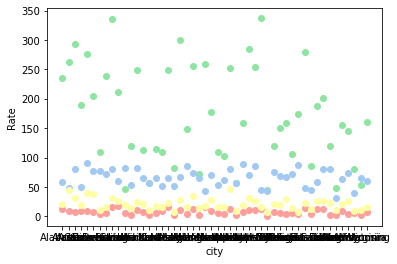

In [13]:
plt.scatter(df.City,df.Murder,color='r')
plt.scatter(df.City,df.Assault,color='g')
plt.scatter(df.City,df.Urbanpop,color='b')
plt.scatter(df.City,df.Rape,color='y')
plt.xlabel('city')
plt.ylabel('Rate')
plt.show()

In [14]:
X= df[['Murder','Assault','Rape','Urbanpop']]

In [15]:
data_norm= preprocessing.scale(X)

In [16]:
data_norm= pd.DataFrame(data_norm)

In [17]:
data_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


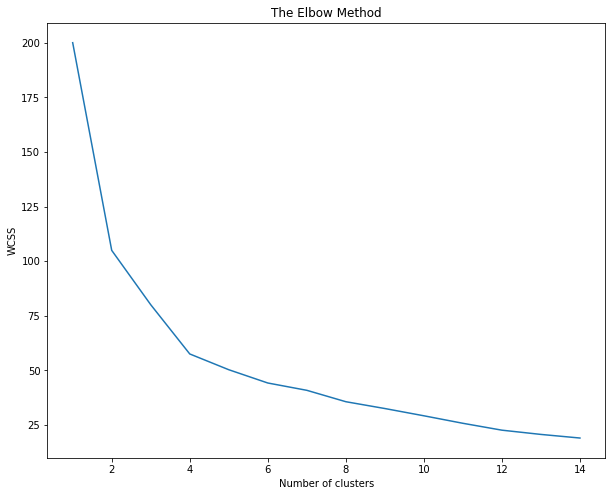

In [18]:
plt.figure(figsize=(10,8))
wcss=[]
for i in range(1,15):
  kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow is at 4 , we can take that as number of clusters.

# Analysing Data

In [19]:
kmeans= KMeans(n_clusters=4, init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data_norm)

In [20]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [21]:
y_kmeans1=y_kmeans+1
cluster=list(y_kmeans1)

In [22]:
df['cluster']=cluster

In [23]:
kmeans_mean_cluster=pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,13.9,243.6,53.8,21.4,332.7
3,10.8,257.4,76.0,33.2,377.4
4,3.6,78.5,52.1,12.2,146.4


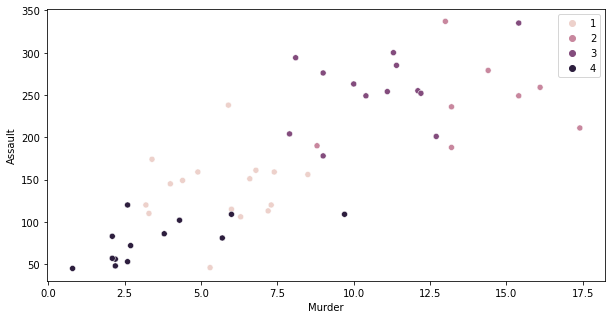

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Murder'],y=df['Assault'],hue=y_kmeans1)

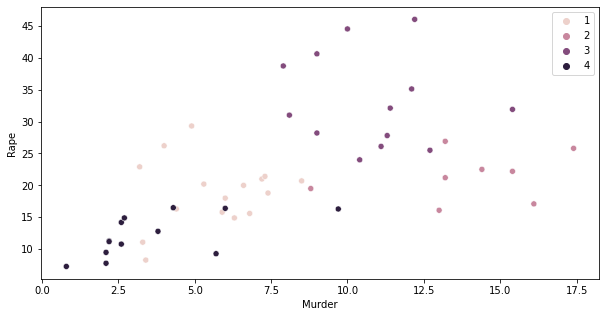

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Murder'],y=df['Rape'],hue=y_kmeans1)

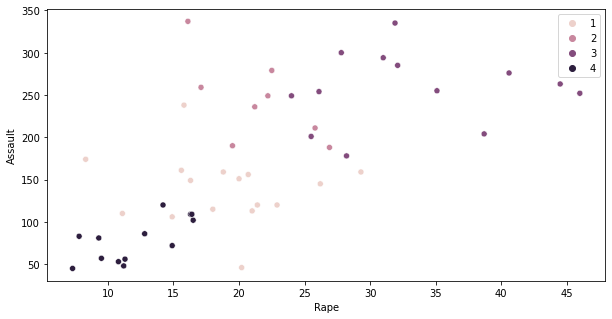

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Rape'],y=df['Assault'],hue=y_kmeans1)

In [27]:
stats=df.sort_values('Total',ascending=True)
df_Total=pd.DataFrame(stats)

In [28]:
df_Total.head()

,City,Murder,Assault,Urbanpop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,4
33,North Dakota,0.8,45,44,7.3,97.1,4
28,New Hampshire,2.1,57,56,9.5,124.6,4
14,Iowa,2.2,56,57,11.3,126.5,4
48,Wisconsin,2.6,53,66,10.8,132.4,4


## Conclusion

Murder and Assault are correlated. 